<a href="https://colab.research.google.com/github/prof-eduardo-nunes/unicamp-mineracao_dados/blob/main/regressao_linear/regressao_plano_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import (show,
                      output_notebook)
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # etapas de preparação dos dados!!!
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)
pd.set_option('display.max_rows', 500)

In [52]:
nomeDaBase = "planos_saude.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [54]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
idade,18,23,28,33,38,39,45,47,50,51
custo,871,1132,1242,1356,1488,1666,1675,1760,1820,2010


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   idade   10 non-null     int64
 1   custo   10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,10.0,37.2,11.487191,18.0,29.25,38.5,46.50,51.0
custo,10.0,1502.0,350.673954,871.0,1270.50,1577.0,1738.75,2010.0


**Breve análise da base:**

não há nulos;

só existem duas variáveis, a idade (variável independente) e o custo (variável dependente);

e não há valores que apresentam incosistências (ex.: negativos quando não é possível).

In [57]:
# Separando os fatores/previsores da resposta/target:

x = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)

# IMPORTANTE! Tive que fazer um reshape nos valores de x e y.

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x, y)

y_pred = regressor.predict(x)

In [59]:
print("Intercepto = {:.3f}".format(regressor.intercept_[0]))
print("Coeficiente = {:.3f}".format(regressor.coef_[0][0]))

Intercepto = 386.345
Coeficiente = 29.991



**Visualisando:**

In [60]:
reta_x = np.linspace(min(x)-5, max(x)+5,100).reshape(-1,1)
reta_y = regressor.predict(reta_x)
reta_df = np.concatenate((reta_x, reta_y), axis=1)
reta_df = pd.DataFrame(reta_df, columns=("x_idade", "y_custo"))

<ipython-input-61-ceb5dd1399e5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x="x_idade", y="y_custo", data=reta_df, alpha=0.3, palette="red");


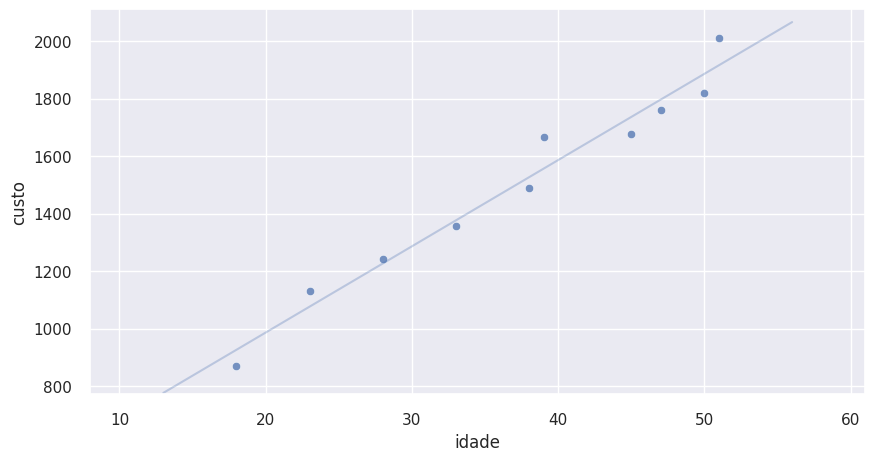

In [61]:
sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)
ax.set(xlim = (min(x)-10, max(x)+10),ylim=(min(y)-100, max(y)+100))
ax = sns.scatterplot(x="idade", y="custo", data=df, alpha=0.75);
ax = sns.lineplot(x="x_idade", y="y_custo", data=reta_df, alpha=0.3, palette="red");

**Verificando o como o modelo se saiu**

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MSE: {:.3f}".format(mean_squared_error(y, y_pred)))
print("RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y, y_pred))))
print("MAE: {:.3f}".format(mean_absolute_error(y, y_pred)))
#print("MAPE:, ", mean_absolute_percentage_error(y_test, y_pred))
print("R2: {:.3f}".format(r2_score(y, y_pred)))

################################################################################
# Cálculo do R2 ajustado:
def r2_ajustado(x, y, y_pred):
    """
    r2_ajustado retorna o R² Ajustado e recebe como argumento as séries com o
    valor alvo teste e o predito.
    """
    n = x.shape[0]
    k = x.shape[1]
    return (1-((n-1)/(n-(k+1)))*(1-r2_score(y, y_pred)))
################################################################################

print("R2 Ajustado: {:.3}".format(r2_ajustado(x, y, y_pred)))

MSE: 3856.990
RMSE: 62.105
MAE: 55.186
R2: 0.965
R2 Ajustado: 0.961


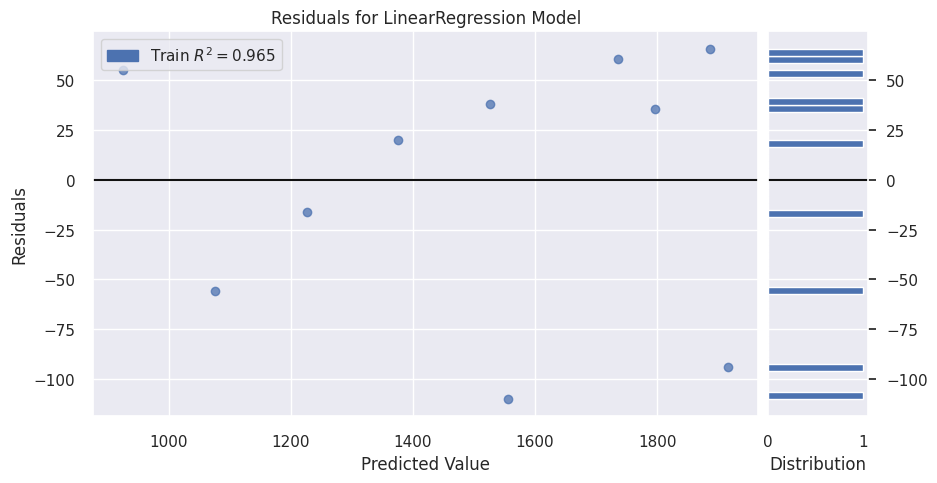

In [64]:
from yellowbrick.regressor import ResidualsPlot

sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)

visualizador = ResidualsPlot(regressor)
visualizador.fit(x, y)
visualizador.poof();